# Импорт данных

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np

In [ ]:
print('Enter working directory, ending with the \'/\':')
work_dir = input()

In [4]:
data_train = pd.read_parquet(work_dir + 'train.parquet', engine='pyarrow')
data_train.head(15)

,Body,Tags,Title,target
Id,,,,
34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2
47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2
46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0
45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0
49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1
59665483,<p>I’m using uicollectionview in storyboard.</...,<swift><scroll><uicollectionview><uiscrollview...,How can i get how to scrolled it is in uicolle...,1
39300476,<p>When I compile my app with tsc I get this e...,<angular>,Angular2 TypeScript Directive error TS2345,0
37095617,<p>I’m using ubuntu 16.04 - 64 bit. I tried to...,<dpkg><staruml><ubuntu-16.04>,Can't install StarUML in Ubuntu 16.04,0
41727898,<p>For example: C:\Users\gabriel\Desktop\</p>\...,<c#><uwp>,How to set the path of the folder to be create...,1


In [5]:
data_test = pd.read_parquet(work_dir + 'test.parquet', engine='pyarrow')
data_test.head(15)

,Body,Tags,Title
Id,,,
46785369,I was given a decision tree with sample data i...,<math><machine-learning><artificial-intelligen...,Desecion trees ended up with same given tree a...
38908667,<p>I am moving a test application over to Xcod...,<ios><swift><swift3><xcode8><nserror>,Value of type 'Error' has no member 'code'
44703012,<p>I would like to be able to perform linting ...,<jenkins><jenkins-pipeline>,How do I lint Jenkins pipelines from the comma...
34910435,"<p>I’m using <a href=""https://github.com/ftlab...",<javascript><css><mobile-safari><fastclick.js>...,Is there a way to prevent fastclick from firin...
51632121,I have some 5 Test cases and I want them to ke...,<android><testing><appium><katalon-studio>,How to loop test cases in katalon Studio?
51606103,<p>I would like to use TensorFlow Transform to...,<tensorflow><word2vec><apache-beam><tensorflow...,Converting tokens to word vectors effectively ...
40083517,<p>I am fetching options for the dropdown menu...,<javascript><html><css><select2>,"How to remove lag when using more than 50,000 ..."
46156990,i am using this xml file to create a page in a...,<java><android><xml>,Error on andriod xml layout
46216185,<p>I am trying to make a method which would ac...,<angular><typescript><loader><ngx-translate>,ngx-translate .instant returns key instead of ...


#Предобработка данных

##Токенизация

In [6]:
from nltk import word_tokenize
from nltk import download
download('punkt')
download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def lower_tokenize_dataset(data):
  for col in ['Body', 'Tags', 'Title']:
    new_colname = 'token' + col
    data[new_colname] = data.apply(lambda row: word_tokenize(row[col]), axis=1)
    data[new_colname] = data.apply(lambda row: [word.lower() for word in row[new_colname] if word.isalpha()], axis=1)
    data[new_colname] = data.apply(lambda row: [word for word in row[new_colname] if word not in stop_words], axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
lower_tokenize_dataset(data_train)
data_train.head(15)

,Body,Tags,Title,target,tokenBody,tokenTags,tokenTitle
Id,,,,,,,
34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2,"[algorithmm, graph, g, set, msts, vertices, g,...","[java, algorithm]","[implementing, minimum, spanning, forrest, alg..."
47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2,"[converting, data, frame, html, date, getting,...","[html, r, dataframe]","[r, studio, date, getting, converted, number, ..."
46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0,"[p, easy, one, somehow, could, find, solution,...","[python, pandas, dataframe]","[pandas, dataframe, groupby, get, sum, multipl..."
45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0,"[p, let, say, component, angular, needs, load,...","[angular, typescript, rxjs]","[casting, results, respective, types, angular]"
49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1,"[p, setting, var, using, code, set, compiling,...","[c, windows]","[environment, variable, set, batch, file, acce..."
59665483,<p>I’m using uicollectionview in storyboard.</...,<swift><scroll><uicollectionview><uiscrollview...,How can i get how to scrolled it is in uicolle...,1,"[p, using, uicollectionview, p, uicollectionvi...","[swift, scroll, uicollectionview, uiscrollview...","[get, scrolled, uicollectionview]"
39300476,<p>When I compile my app with tsc I get this e...,<angular>,Angular2 TypeScript Directive error TS2345,0,"[p, compile, app, tsc, get, error, pre, code, ...",[angular],"[typescript, directive, error]"
37095617,<p>I’m using ubuntu 16.04 - 64 bit. I tried to...,<dpkg><staruml><ubuntu-16.04>,Can't install StarUML in Ubuntu 16.04,0,"[p, using, ubuntu, bit, tried, install, start,...","[dpkg, staruml]","[ca, install, staruml, ubuntu]"
41727898,<p>For example: C:\Users\gabriel\Desktop\</p>\...,<c#><uwp>,How to set the path of the folder to be create...,1,"[p, example, c, p, creates, folder, desktop, p...","[c, uwp]","[set, path, folder, created, uwp, c]"


In [8]:
lower_tokenize_dataset(data_test)
data_test.head(15)

,Body,Tags,Title,tokenBody,tokenTags,tokenTitle
Id,,,,,,
46785369,I was given a decision tree with sample data i...,<math><machine-learning><artificial-intelligen...,Desecion trees ended up with same given tree a...,"[given, decision, tree, sample, data, class, s...","[math, entropy]","[desecion, trees, ended, given, tree, computat..."
38908667,<p>I am moving a test application over to Xcod...,<ios><swift><swift3><xcode8><nserror>,Value of type 'Error' has no member 'code',"[p, moving, test, application, xcode, beta, co...","[ios, swift, nserror]","[value, type, member]"
44703012,<p>I would like to be able to perform linting ...,<jenkins><jenkins-pipeline>,How do I lint Jenkins pipelines from the comma...,"[p, would, like, able, perform, linting, jenki...",[jenkins],"[lint, jenkins, pipelines, command, line]"
34910435,"<p>I’m using <a href=""https://github.com/ftlab...",<javascript><css><mobile-safari><fastclick.js>...,Is there a way to prevent fastclick from firin...,"[p, using, https, fastclick, page, large, link...","[javascript, css, fastclick]","[way, prevent, fastclick, firing, active, stat..."
51632121,I have some 5 Test cases and I want them to ke...,<android><testing><appium><katalon-studio>,How to loop test cases in katalon Studio?,"[test, cases, want, keep, running, times, orde...","[android, testing, appium]","[loop, test, cases, katalon, studio]"
51606103,<p>I would like to use TensorFlow Transform to...,<tensorflow><word2vec><apache-beam><tensorflow...,Converting tokens to word vectors effectively ...,"[p, would, like, use, tensorflow, transform, c...","[tensorflow, glove]","[converting, tokens, word, vectors, effectivel..."
40083517,<p>I am fetching options for the dropdown menu...,<javascript><html><css><select2>,"How to remove lag when using more than 50,000 ...","[p, fetching, options, dropdown, menu, databas...","[javascript, html, css]","[remove, lag, using, options, select, tag, html]"
46156990,i am using this xml file to create a page in a...,<java><android><xml>,Error on andriod xml layout,"[using, xml, file, create, page, android, xml,...","[java, android, xml]","[error, andriod, xml, layout]"
46216185,<p>I am trying to make a method which would ac...,<angular><typescript><loader><ngx-translate>,ngx-translate .instant returns key instead of ...,"[p, trying, make, method, would, accept, strin...","[angular, typescript, loader]","[returns, key, instead, value]"


##POS tagging, лемматизация

Определим принадлежность каждого слова к определённой части речи, чтобы была возможность применить `WordNetLemmatizer`. Для нас представляют интерес только **самостоятельные** части речи.

In [9]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
download('wordnet')
download('averaged_perceptron_tagger')

# Deal with various forms of particular POS' (e.g. gerund forms are still verbs)
def get_wordnet_pos(tag):
  if tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatize_wordvec(wordvec):
  res_wordvec = []
  lemmatizer = WordNetLemmatizer()
  for item in pos_tag(wordvec):
    word = item[0]
    pos = get_wordnet_pos(item[1])
    if pos != None:
      res_wordvec.append(lemmatizer.lemmatize(word, pos=pos))
  return res_wordvec

def lemmatize_dataset(data):
  for col in ['tokenBody', 'tokenTags', 'tokenTitle']:
    new_colname = col.replace('token', 'lemmatized')
    data[new_colname] = data.apply(lambda row: lemmatize_wordvec(row[col]), axis=1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [98]:
lemmatize_dataset(data_train)
data_train.head(10)

,Body,Tags,Title,target,tokenBody,tokenTags,tokenTitle,lemmatizedBody,lemmatizedTags,lemmatizedTitle,hasTags,titleLength,bodyLength,lemmatizedBodyText,lemmatizedTitleText,lemmatizedTagsText
Id,,,,,,,,,,,,,,,,
34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2,"[algorithmm, graph, g, set, msts, vertices, g,...","[java, algorithm]","[implementing, minimum, spanning, forrest, alg...","[algorithmm, graph, g, set, mst, vertex, g, cr...","[java, algorithm]","[implement, minimum, span, forrest, algorihm, ...",True,9,43,algorithmm graph g set mst vertex g create tre...,implement minimum span forrest algorihm java s...,java algorithm
47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2,"[converting, data, frame, html, date, getting,...","[html, r, dataframe]","[r, studio, date, getting, converted, number, ...","[convert, data, frame, html, date, get, conver...","[html, r, dataframe]","[r, studio, date, get, converted, number, make...",True,9,10,convert data frame html date get convert numbe...,r studio date get converted number make html d...,html r dataframe
46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0,"[p, easy, one, somehow, could, find, solution,...","[python, pandas, dataframe]","[pandas, dataframe, groupby, get, sum, multipl...","[p, easy, somehow, find, solution, p, panda, d...","[python, panda, dataframe]","[panda, dataframe, groupby, get, sum, multiple...",True,7,67,easy somehow find solution panda dataframe loo...,panda dataframe groupby get sum multiple column,python panda dataframe
45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0,"[p, let, say, component, angular, needs, load,...","[angular, typescript, rxjs]","[casting, results, respective, types, angular]","[p, let, say, component, angular, need, load, ...","[angular, typescript, rxjs]","[cast, result, respective, type, angular]",True,5,99,let say component angular need load different ...,cast result respective type angular,angular typescript rxjs
49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1,"[p, setting, var, using, code, set, compiling,...","[c, windows]","[environment, variable, set, batch, file, acce...","[p, set, var, use, code, set, compile, c, code...","[c, window]","[environment, variable, set, batch, file, acce...",True,10,12,set var use code set compile c code error find...,environment variable set batch file access c c...,c window
59665483,<p>I’m using uicollectionview in storyboard.</...,<swift><scroll><uicollectionview><uiscrollview...,How can i get how to scrolled it is in uicolle...,1,"[p, using, uicollectionview, p, uicollectionvi...","[swift, scroll, uicollectionview, uiscrollview...","[get, scrolled, uicollectionview]","[p, use, uicollectionview, p, uicollectionview...","[swift, scroll, uicollectionview, uiscrollview...","[get, scroll, uicollectionview]",True,3,13,use uicollectionview uicollectionview scroll w...,get scroll uicollectionview,swift scroll uicollectionview uiscrollview uis...
39300476,<p>When I compile my app with tsc I get this e...,<angular>,Angular2 TypeScript Directive error TS2345,0,"[p, compile, app, tsc, get, error, pre, code, ...",[angular],"[typescript, directive, error]","[p, compile, app, tsc, get, error, pre, code, ...",[angular],"[typescript, directive, error]",True,3,97,compile app tsc get error pre code error argum...,typescript directive error,angular
37095617,<p>I’m using ubuntu 16.04 - 64 bit. I tried to...,<dpkg><staruml><ubuntu-16.04>,Can't install StarUML in Ubuntu 16.04,0,"[p, using, ubuntu, bit, tried, install, start,...","[dpkg, staruml]","[ca, install, s

In [99]:
lemmatize_dataset(data_test)
data_test.head(10)

,Body,Tags,Title,tokenBody,tokenTags,tokenTitle,lemmatizedBody,lemmatizedTags,lemmatizedTitle,lemmatizedBodyText,lemmatizedTitleText,lemmatizedTagsText,LogReg_target,RandForest_target,SVM_target
Id,,,,,,,,,,,,,,,
46785369,I was given a decision tree with sample data i...,<math><machine-learning><artificial-intelligen...,Desecion trees ended up with same given tree a...,"[given, decision, tree, sample, data, class, s...","[math, entropy]","[desecion, trees, ended, given, tree, computat...","[give, decision, tree, sample, data, class, so...","[math, entropy]","[desecion, tree, end, give, tree, computation]",give decision tree sample data class solve com...,desecion tree end give tree computation,math entropy,2,2,1
38908667,<p>I am moving a test application over to Xcod...,<ios><swift><swift3><xcode8><nserror>,Value of type 'Error' has no member 'code',"[p, moving, test, application, xcode, beta, co...","[ios, swift, nserror]","[value, type, member]","[p, move, test, application, xcode, beta, conv...","[io, swift, nserror]","[value, type, member]",move test application xcode beta convert code ...,value type member,io swift nserror,0,0,0
44703012,<p>I would like to be able to perform linting ...,<jenkins><jenkins-pipeline>,How do I lint Jenkins pipelines from the comma...,"[p, would, like, able, perform, linting, jenki...",[jenkins],"[lint, jenkins, pipelines, command, line]","[p, like, able, perform, linting, jenkins, pip...",[jenkins],"[lint, jenkins, pipeline, command, line]",like able perform linting jenkins pipeline see...,lint jenkins pipeline command line,jenkins,0,0,0
34910435,"<p>I’m using <a href=""https://github.com/ftlab...",<javascript><css><mobile-safari><fastclick.js>...,Is there a way to prevent fastclick from firin...,"[p, using, https, fastclick, page, large, link...","[javascript, css, fastclick]","[way, prevent, fastclick, firing, active, stat...","[p, use, https, fastclick, page, large, link, ...","[javascript, cs, fastclick]","[way, prevent, fastclick, fire, active, state,...",use https fastclick page large link want bypas...,way prevent fastclick fire active state scroll,javascript cs fastclick,1,0,1
51632121,I have some 5 Test cases and I want them to ke...,<android><testing><appium><katalon-studio>,How to loop test cases in katalon Studio?,"[test, cases, want, keep, running, times, orde...","[android, testing, appium]","[loop, test, cases, katalon, studio]","[test, case, want, keep, run, time, order, ple...","[android, test, appium]","[loop, test, case, katalon, studio]",test case want keep run time order please help...,loop test case katalon studio,android test appium,1,2,2
51606103,<p>I would like to use TensorFlow Transform to...,<tensorflow><word2vec><apache-beam><tensorflow...,Converting tokens to word vectors effectively ...,"[p, would, like, use, tensorflow, transform, c...","[tensorflow, glove]","[converting, tokens, word, vectors, effectivel...","[p, like, use, tensorflow, transform, convert,...","[tensorflow, glove]","[convert, token, word, vector, effectively, te...",like use tensorflow transform convert tokens w...,convert token word vector effectively tensorfl...,tensorflow glove,0,0,0
40083517,<p>I am fetching options for the dropdown menu...,<javascript><html><css><select2>,"How to remove lag when using more than 50,000 ...","[p, fetching, options, dropdown, menu, databas...","[javascript, html, css]","[remove, lag, using, options, select, tag, html]","[p, fetching, option, dropdown, menu, database...","[javascript, html, cs]","[remove, lag, use, option, select, tag, html]",fetching option dropdown menu database already...,remove lag use option select tag html,javascript html cs,2,2,2
46156990,i am using this xml file to create a page in a...,<java><android><xml>,Error on andriod xml layout,"[using, xml, file, create, page, android, xml,...","[java, android, xml]","[error, andriod, xml, layout]","[use, xml, file, create, page, android, xml, x...","[java, android, xml]","[error, andriod, layo

#EDA

##Распределение по классам

In [12]:
import matplotlib.pyplot as plt

def plot_target_donut(data):
  rating_data = data.reset_index().groupby('target')[['Id']].count()
  plt.figure(figsize = (12, 8))
  plt.pie(rating_data, autopct = '%1.0f%%', startangle = 140, pctdistance = 1.1, shadow = True)
  gap = plt.Circle((0, 0), 0.5, fc = 'white')
  fig = plt.gcf()
  fig.gca().add_artist(gap)
  cols = []
  for index, row in rating_data.iterrows():
      cols.append(index)
  plt.legend(cols)
  plt.title('Donut Plot: SOF Questions by category', loc='center')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


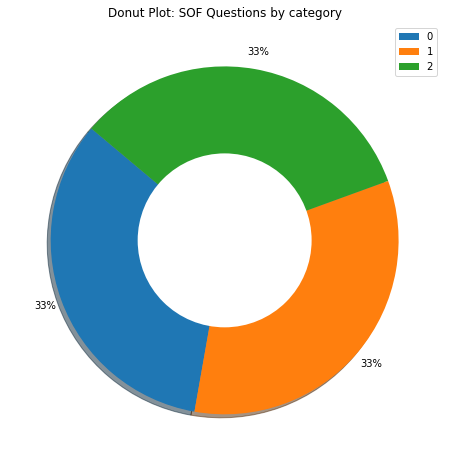

In [13]:
plot_target_donut(data_train)

Видим, что в тренировочной выборке распределение абсолютно равномерное.

##Частота слов

In [100]:
from collections import Counter
from itertools import islice
for col in ['lemmatizedTitle', 'lemmatizedBody', 'lemmatizedTags']:
  token_counts = Counter(word for item in data_train[col]
                              for word in item)
  print(col + ':', dict(islice(token_counts.items(), 50)))

lemmatizedTitle: {'implement': 228, 'minimum': 45, 'span': 32, 'forrest': 1, 'algorihm': 2, 'java': 1795, 'stick': 40, 'write': 565, 'loop': 839, 'r': 535, 'studio': 850, 'date': 756, 'get': 2698, 'converted': 2, 'number': 1357, 'make': 1058, 'html': 738, 'datafrane': 1, 'panda': 216, 'dataframe': 210, 'groupby': 19, 'sum': 228, 'multiple': 895, 'column': 810, 'cast': 82, 'result': 406, 'respective': 5, 'type': 1015, 'angular': 660, 'environment': 119, 'variable': 1216, 'set': 783, 'batch': 110, 'file': 2556, 'access': 550, 'c': 2130, 'code': 1896, 'compile': 187, 'scroll': 137, 'uicollectionview': 12, 'typescript': 295, 'directive': 37, 'error': 2558, 'install': 282, 'staruml': 1, 'ubuntu': 113, 'path': 220, 'folder': 222, 'create': 1377, 'uwp': 21}
lemmatizedBody: {'algorithmm': 1, 'graph': 370, 'g': 1225, 'set': 7487, 'mst': 1, 'vertex': 135, 'create': 9342, 'tree': 469, 'single': 1436, 'b': 6231, 'add': 6749, 'end': 4717, 'repeat': 454, 'find': 9311, 'edge': 228, 'e': 3224, 'minimu

Бросается в глаза `p` - с позволения сказать, *слово*, сохранившееся в "телах" вопросов (на самом деле, не замеченный нами ранее HTML-тэг). На мгновение вернёмся к предобработке и очистим наши данные от этого тэга.

In [15]:
def clean_data_from_tags(data):
  data['lemmatizedBody'] = data.apply(lambda row: [word for word in row['lemmatizedBody'] if word != 'p'], axis=1)
clean_data_from_tags(data_train)
clean_data_from_tags(data_test)

In [16]:
token_counts = Counter(word for item in data_train['lemmatizedBody']
                            for word in item)
print(token_counts)

Counter({'code': 82215, 'gt': 70747, 'lt': 66606, 'pre': 32824, 'use': 31866, 'string': 22033, 'int': 21498, 'new': 20736, 'http': 20382, 'get': 20222, 'return': 18147, 'error': 18064, 'try': 17806, 'file': 17483, 'want': 16363, 'public': 15473, 'function': 14539, 'work': 13504, 'value': 13334, 'class': 13330, 'name': 12839, 'android': 12603, 'data': 11982, 'import': 11702, 'void': 9852, 'need': 9507, 'run': 9362, 'create': 9342, 'find': 9311, 'c': 9092, 'help': 8892, 'number': 8759, 'input': 8700, 'array': 8682, 'true': 8426, 'print': 8395, 'user': 8372, 'list': 8181, 'make': 8145, 'way': 8061, 'noreferrer': 8038, 'line': 8028, 'var': 8018, 'amp': 7935, 'follow': 7932, 'image': 7906, 'type': 7804, 'know': 7758, 'x': 7574, 'set': 7487, 'else': 7457, 'div': 7252, 'false': 7250, 'li': 7070, 'id': 7021, 'null': 6981, 'strong': 6957, 'object': 6952, 'result': 6901, 'time': 6779, 'add': 6749, 'app': 6748, 'please': 6709, 'example': 6462, 'method': 6403, 'enter': 6358, 'problem': 6269, 'b': 

##Влияние факта наличия тэгов

In [17]:
data_train['hasTags'] = data_train.apply(lambda row: len(row['lemmatizedTags']) > 0, axis=1)
data_train[['target', 'hasTags']].groupby('target').describe()

hasTags                    
         count unique   top   freq
target                            
0        16000      2  True  14528
1        16000      2  True  15231
2        16000      2  True  15186

Видим, что доля вопросов с тэгами примерно одинаковая во всех категориях. Сам по себе этот факт вряд ли повлияет на поведение наших моделей.

In [ ]:
data_train.drop('hasTags', axis=1)

##Влияние длины заголовка и основного вопроса

In [19]:
data_train['titleLength'] = data_train.apply(lambda row: len(row['lemmatizedTitle']), axis=1)
data_train[['target', 'titleLength']].groupby('target').describe()

titleLength                                              
             count      mean       std  min  25%  50%  75%   max
target                                                          
0          16000.0  5.052562  1.962916  0.0  4.0  5.0  6.0  16.0
1          16000.0  5.015813  1.966483  0.0  4.0  5.0  6.0  17.0
2          16000.0  5.527000  2.366352  0.0  4.0  5.0  7.0  19.0

In [96]:
data_train[['target', 'titleLength']].groupby('target').median()

,titleLength
target,
0,5
1,5
2,5


Видим, что заголовки вопросов из 2 (самой "плохой") категории в среднем длиннее, хотя медиана совпадает по всем значениям таргета (т.е. просто есть небольшой кластер "особо длинных" заголовков, преимущественно относящийся ко 2 категории). Эмпирически легко подтвердить, что чем длиннее заголовок, тем противнее вопрос... Посмотрим теперь на длину основного текста вопроса.

In [20]:
data_train['bodyLength'] = data_train.apply(lambda row: len(row['lemmatizedBody']), axis=1)
data_train[['target', 'bodyLength']].groupby('target').describe()

bodyLength                                                      
            count       mean        std  min   25%   50%    75%     max
target                                                                 
0         16000.0  66.437562  65.080606  3.0  30.0  50.0  81.25  1640.0
1         16000.0  51.124063  78.665265  1.0  19.0  32.0  56.00  2531.0
2         16000.0  52.320875  67.683466  0.0  20.0  34.0  59.00  1944.0

In [21]:
data_train[['target', 'bodyLength']].groupby('target').median()

,bodyLength
target,
0,50
1,32
2,34


Видим, что "хорошие" вопросы в среднем длиннее. На "сгруппированной" гистограмме кол-ва вопросов это будет отражаться в "хвосте" графика - убедимся же в этом.

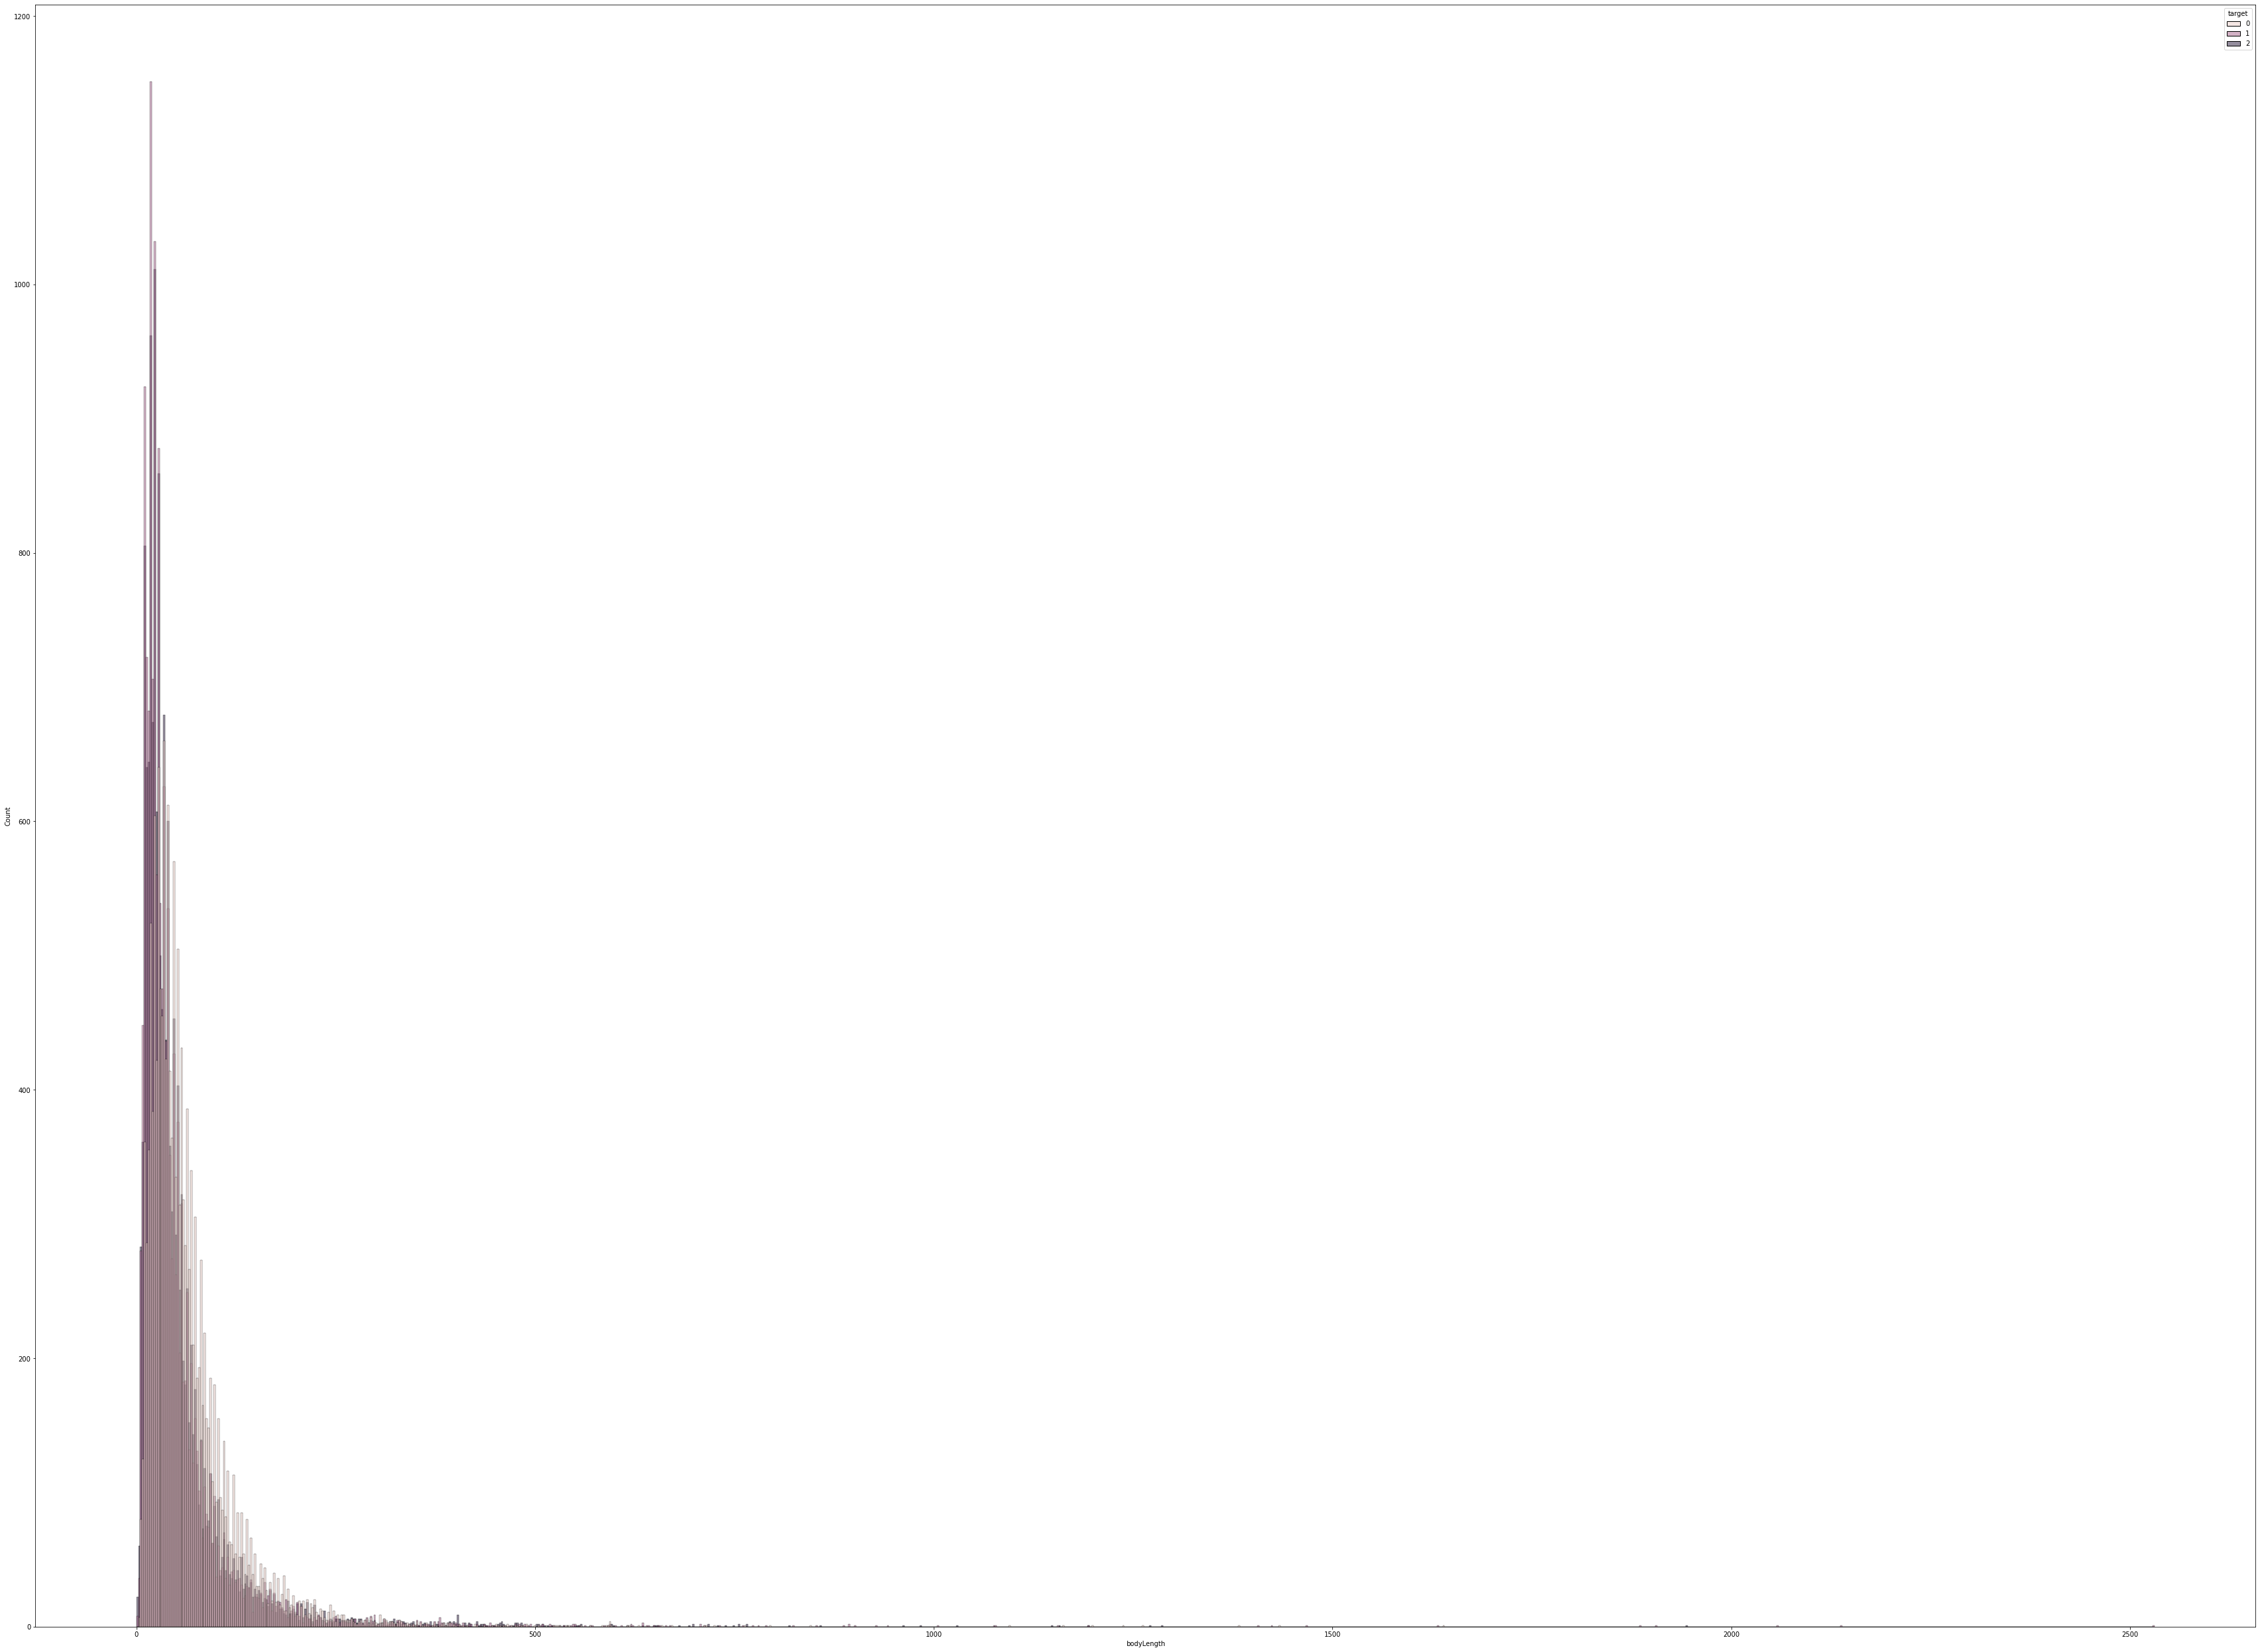

In [22]:
import seaborn as sns

plt.figure(figsize = (60, 45))
sns.histplot(data=data_train, x='bodyLength', hue='target')

Ну и, для общего порядка, визуализируем связь между длиной заголовка и длиной текста.

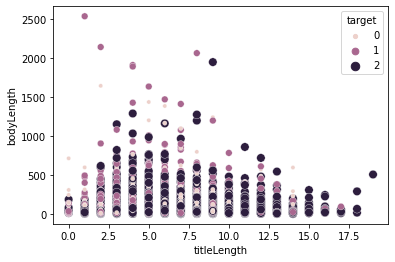

In [23]:
sns.scatterplot(data=data_train, x='titleLength', y='bodyLength', hue='target', size='target')

Сделать какие-либо содержательные выводы сложно, хотя бросается в глаза небольшой "кластер выбросов" с длинным текстом вопроса и коротким заголовком, относящийся к категории "плохих, но активных" вопросов.

#Векторизация/embedding

In [27]:
def merge_list_to_text(data):
  merged_colname_postfix = 'Text'
  for col in ['lemmatizedBody', 'lemmatizedTitle', 'lemmatizedTags']:
    data[col + merged_colname_postfix] = data.apply(lambda row: " ".join(word for word in row[col]), axis=1)

In [30]:
merge_list_to_text(data_train)
merge_list_to_text(data_test)

In [33]:
# Save intermediate results
data_train[['target', 'lemmatizedTitleText', 'lemmatizedTagsText', 'lemmatizedBodyText']].to_csv(work_dir + 'train_pre_embed.csv')
data_test[['lemmatizedTitleText', 'lemmatizedTagsText', 'lemmatizedBodyText']].to_csv(work_dir + 'test_pre_embed.csv')

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

train_vec_Body = vectorizer.fit_transform(data_train['lemmatizedBodyText'])
test_vec_Body = vectorizer.transform(data_test['lemmatizedBodyText'])
train_vec_Tags = vectorizer.fit_transform(data_train['lemmatizedTagsText'])
test_vec_Tags = vectorizer.transform(data_test['lemmatizedTagsText'])
train_vec_Title = vectorizer.fit_transform(data_train['lemmatizedTitleText'])
test_vec_Title = vectorizer.transform(data_test['lemmatizedTitleText'])

In [53]:
from scipy.sparse import hstack

In [65]:
X_train_pre_split = hstack((train_vec_Title, train_vec_Body, train_vec_Tags))
Y_train_pre_split = data_train['target']
X_test = hstack((test_vec_Title, test_vec_Body, test_vec_Tags))
X_test.shape

(12000, 109753)

#Classic ML algorithms

##Разбиение на тренировочную и валидационную выборки

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_pre_split, Y_train_pre_split, test_size=0.5, random_state=42)

##Generic prediction method

In [95]:
#import os
#os.mkdir(work_dir + 'Lab 1 - Results')

In [93]:
from sklearn.metrics import classification_report

def run_classifier(classifier, name):
  classifier.fit(X_train, Y_train)
  print(classification_report(Y_valid, classifier.predict(X_valid), labels=[0, 1, 2]))
  test_colname = name + '_target'
  data_test[test_colname] = classifier.predict(X_test)
  data_test.reset_index()[['Id', test_colname]].to_csv(work_dir + 'Lab 1 - Results/' + name + '_test.csv')

##Logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(max_iter=200000)
run_classifier(LR_classifier, 'LogReg')

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7952
           1       0.77      0.70      0.74      8040
           2       0.79      0.85      0.82      8008

    accuracy                           0.80     24000
   macro avg       0.80      0.80      0.80     24000
weighted avg       0.80      0.80      0.80     24000



##SVM

In [87]:
from sklearn.svm import SVC
SVM_classifier = SVC()
run_classifier(SVM_classifier, 'SVM')

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7952
           1       0.78      0.66      0.72      8040
           2       0.76      0.86      0.81      8008

    accuracy                           0.79     24000
   macro avg       0.79      0.79      0.79     24000
weighted avg       0.79      0.79      0.79     24000



##Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
RandForest_classifier = RandomForestClassifier()
run_classifier(RandForest_classifier, 'RandForest')

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      7952
           1       0.77      0.69      0.73      8040
           2       0.79      0.87      0.83      8008

    accuracy                           0.79     24000
   macro avg       0.79      0.79      0.79     24000
weighted avg       0.79      0.79      0.79     24000



##Desicion Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
DecTree_classifier = DecisionTreeClassifier()
run_classifier(RandForest_classifier, 'DecisionTree')

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7952
           1       0.78      0.70      0.74      8040
           2       0.79      0.87      0.83      8008

    accuracy                           0.80     24000
   macro avg       0.80      0.80      0.80     24000
weighted avg       0.80      0.80      0.80     24000

